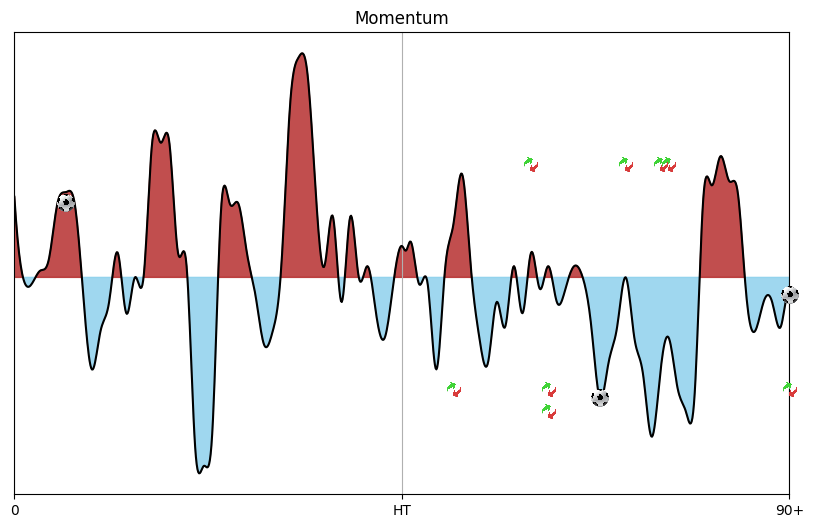

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from main_data import main_content, data
from collections import Counter
import json


with open('../../data/whoscored/data.json', 'r') as file:
    whoscored_data = json.load(file)


def print_momentum_data(data: dict):

    minutes = np.array([entry['minute'] for entry in data])
    values = np.array([entry['value'] for entry in data])

    unique_minutes, unique_indices = np.unique(minutes, return_index=True)
    unique_values = values[unique_indices]

    interpolation_model = interp1d(
        unique_minutes, unique_values, kind="cubic", fill_value="extrapolate")

    home_subs_y = 50
    away_subs_y = -50

    X_ = np.linspace(0, 90, 1000)

    Y_ = interpolation_model(X_)

    plt.figure(figsize=(10, 6))

    plt.fill_between(X_, Y_, where=(Y_ < 0),
                     interpolate=True, color='skyblue', alpha=0.8)

    plt.fill_between(X_, Y_, where=(Y_ >= 0),
                     interpolate=True, color='firebrick', alpha=0.8)

    plt.plot(X_, Y_, color='black')
    plt.xlim(0, 90)
    plt.xticks(np.arange(0, 92, step=45), labels=['0', "HT", "90+"])
    plt.yticks([])
    plt.grid(True, axis='x')
    for minute in goals_minutes:
        ab = AnnotationBbox(
            OffsetImage(image, zoom=0.025), (minute, values[minute]), frameon=False)
        plt.gca().add_artist(ab)

    for el in subs_minutes:
        ab = AnnotationBbox(
            OffsetImage(sub_image, zoom=0.02),
            (el[0] if el[0] <= data[len(data) - 1]['minute'] else 90, home_subs_y if el[1] ==
             65 else away_subs_y),
            frameon=False)
        plt.gca().add_artist(ab)

    for el in double_subs:
        home_subs_y = home_subs_y + \
            10 if el[1] == whoscored_data['matchCentreData']['home']['teamId'] else + 0
        away_subs_y = away_subs_y - \
            10 if el[1] == whoscored_data['matchCentreData']['away']['teamId'] else - 0
        ab = AnnotationBbox(
            OffsetImage(sub_image, zoom=0.02),
            (el[0] if el[0] <= data[len(data) - 1]['minute'] else data[len(data) - 1]['minute'], home_subs_y if el[1] ==
             whoscored_data['matchCentreData']['home']['teamId'] else away_subs_y,),
            frameon=False)
        plt.gca().add_artist(ab)

    plt.title('Momentum')

    plt.show()


momentum_data = main_content['matchFacts']['momentum']['main']['data']

home_team_goals_data = data['props']['pageProps']['header']['events']['homeTeamGoals']
away_team_goals_data = data['props']['pageProps']['header']['events']['awayTeamGoals']

goals_minutes = []

# Read an image from a file into an array.
path = './ball.png'
image = plt.imread(path)

subs_img_path = './sub.png'
sub_image = plt.imread(subs_img_path)


home_team_subs = list(filter(lambda x: (
    x['type']['displayName'] == 'SubstitutionOn'
    and x['teamId'] == whoscored_data['matchCentreData']['home']['teamId']
), whoscored_data['matchCentreData']['events']))

away_team_subs = list(filter(lambda x: (
    x['type']['displayName'] == 'SubstitutionOn'
    and x['teamId'] == whoscored_data['matchCentreData']['away']['teamId']
), whoscored_data['matchCentreData']['events']))

subs_data = []

# Set goal minute into array
for goal in home_team_goals_data.values():
    for el in goal:
        goals_minutes.append(el['time'])

for goal in away_team_goals_data.values():
    for el in goal:
        goals_minutes.append(el['time'])

# Set sub minute and id into array
for sub in home_team_subs:
    subs_data.append({'minute': sub['minute'], 'team_id': sub['teamId']})

for sub in away_team_subs:
    subs_data.append({'minute': sub['minute'], 'team_id': sub['teamId']})


# Extract minutes and team IDs from the data
subs_minutes = [(entry['minute'], entry['team_id'])
                for entry in subs_data]

# Check for double subs
double_subs = [item for item, count in Counter(
    subs_minutes).items() if count > 1]


print_momentum_data(momentum_data)